search 想法:
必須去比較，碰到相等就是目標，比完較小往左走，比完較大往右走，走到盡頭就結束。
➡️利用遞迴重複比較
target 與 root 比較
root要持續往下跑，與target比較

case1 : root不存在，根本找不到，return none

case2 : root存在，等於target，return root

case3 : root存在，root > target，往左比較

case4 : root存在，root < target，往右比較

In [5]:
def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        if root == None:
            return none
        elif root.val == target:
            return root
        elif root.val > target:
            return self.search(root.left,target)
        else:
            return self.search(root.right,target)

參考資料
雖然是C語言，可是作者對於每個步驟都有解釋，我在用自己的理解寫下來

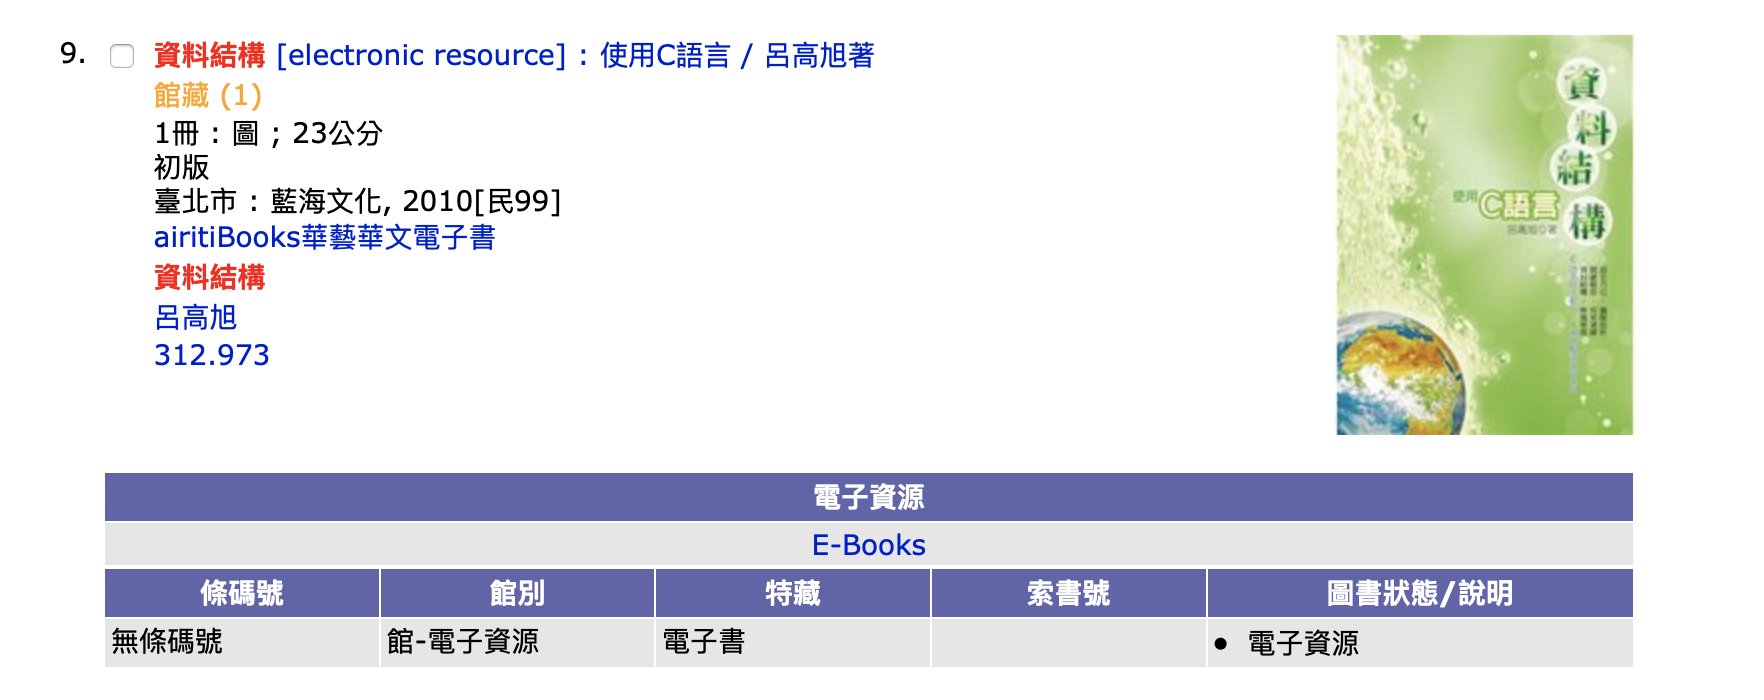

In [2]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/螢幕快照 2019-11-22 上午2.22.44.png")

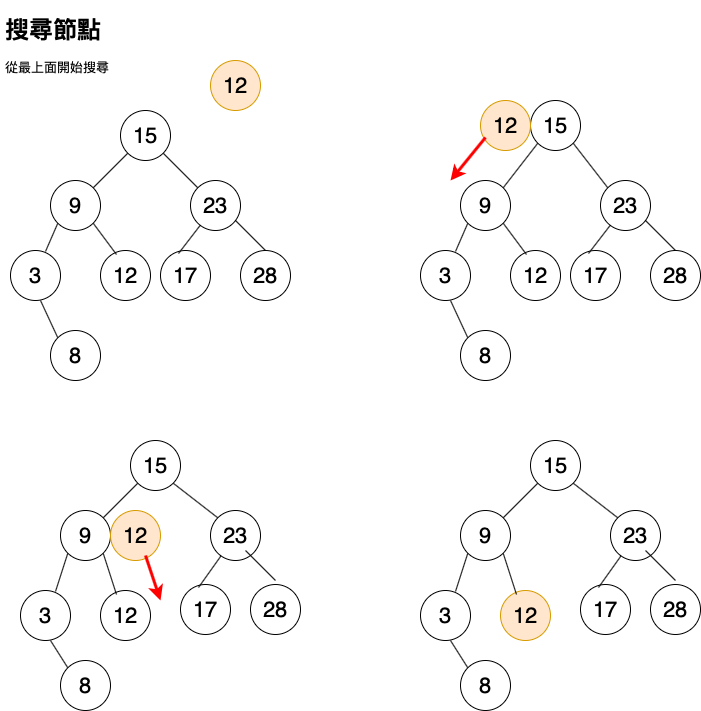

In [4]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/11:22作業/search_node.png")

delete 想法：
case2: 當刪除帶有兩個節點的值時，先刪除目標後，需將左子樹最大值取代刪除值
我一直在想要如何找出最大，發現“最大值不會有右節點”
同理，若今天找右子樹的最小值取代刪除值，它一樣“不會有左節點”
資料串接：三個指標，分別指向父節點、右節點、左節點

case1 : 若無子節點，刪除目標節點即可。

case2 : 刪除帶有一個子節點時，“有右節點，無左節點”，直接刪除

case3 : 刪除帶有一個子節點時，“有左節點，無右節點”，必須考慮重複值的狀況
                                                                              重複：重新呼叫self.delete(root.left,target)
                                                                              無重複：直接刪除
case4 : 刪除帶有兩個子節點時degree = 2，先刪除目標節點，再從被刪除的左子樹，找出最大值取代刪除值，或從右子樹找出最小值取代。


In [6]:
def delete(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(the root of new completed binary search tree) (cannot search())

        """
        if root is None:
            return root
        elif root.val == target:
            if root.left is None and root.right is None:
                return None
            elif root.left is None and root.right is not None:
                return root.right
            elif root.left is not None and root.right is None:
                if root.left.val == target:
                    root.left = self.delete(root.left, target)
                return root.left
            else:
                if root.left.val == target:
                    root.left = self.delete(root.left, target)
                cur = cur.right
                while cur.left is not None:
                    cur=cur.left
                root.val = cur.val
                cur.val = target
                root.right = self.delete(root.right, target)
        elif root.val > target:
            root.left = self.delete(root.left, target)
        else:
            root.right = self.delete(root.right, target)
        return root

參考資料：http://hk.voidcc.com/question/p-kuuabagm-bob.html

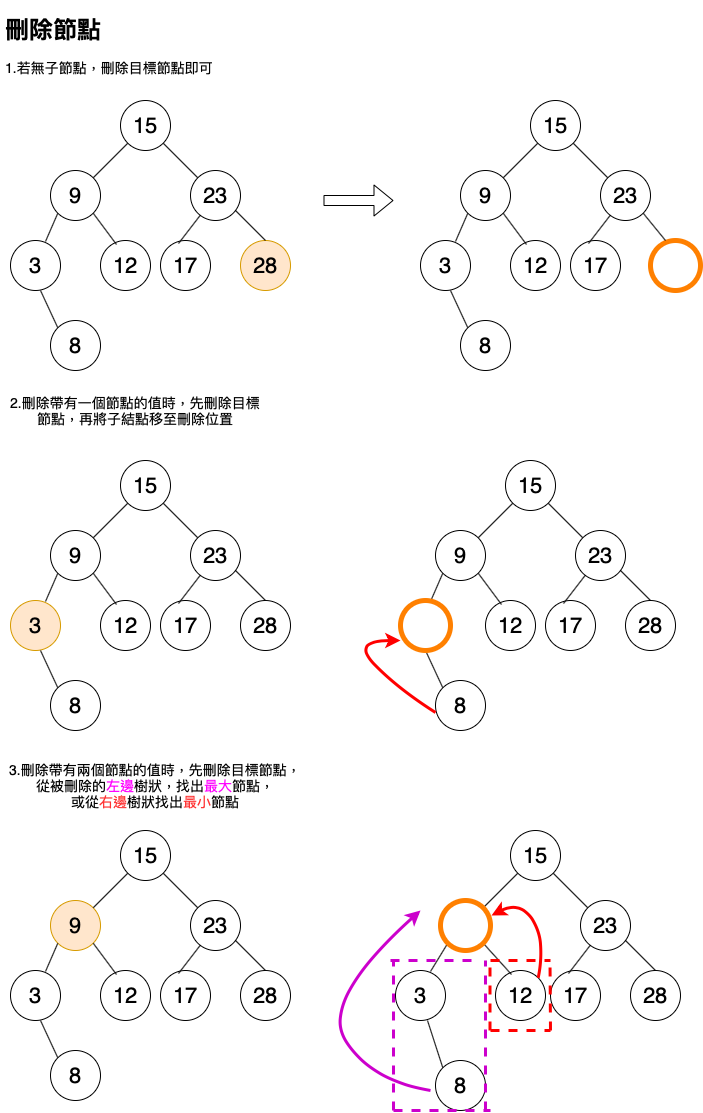

In [7]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/11:22作業/delete_node.png")

insert 想法：
利用遞迴的方式，知道新增的值應該在哪加入
think➡️當前節點爲空時，說明應該將「插入節點」插入到上一個遍歷節點的左子節點或右子節點。

case1 : root沒有值，直接將值賦予root

   case2 : root有值且"大於"val，右左比較，但沒有左節點，val = root.left
   case3 : root有值且"大於"val，右左比較，仍有左節點，self.insert(root.left,val)
    
   case4 : root有值且"小於"val，向右比較，但沒有右節點，val = root.right
   case5 : root有值且"小於"val，向右比較，有右節點，self.insert(root.right,val)
   
   case6 : root有值且root = val，新增在root的左節點

In [8]:
def insert(self, root, val):

        """
        :type root: TreeNode
        :type val: int
        :rtype: TreeNode(inserted node)

        """

        if root.val is not None:
            if val < root.val:
                if root.left is None:
                    root.left = TreeNode(val)
                else:
                    self.insert(root.left,val)
            elif val == root.val:
                if root.left is None:
                    root.left = TreeNode(val)
                else:
                    temp = TreeNode(val)
                    temp.left = root.left
                    root.left = temp
            else:
                if root.right is None:
                    root.right = TreeNode(val)
                else:
                    self.insert(root.right, val)
        else:
            root.val =val

參考資料：https://algorithm.yuanbin.me/zh-tw/binary_search_tree/insert_node_in_a_binary_search_tree.html

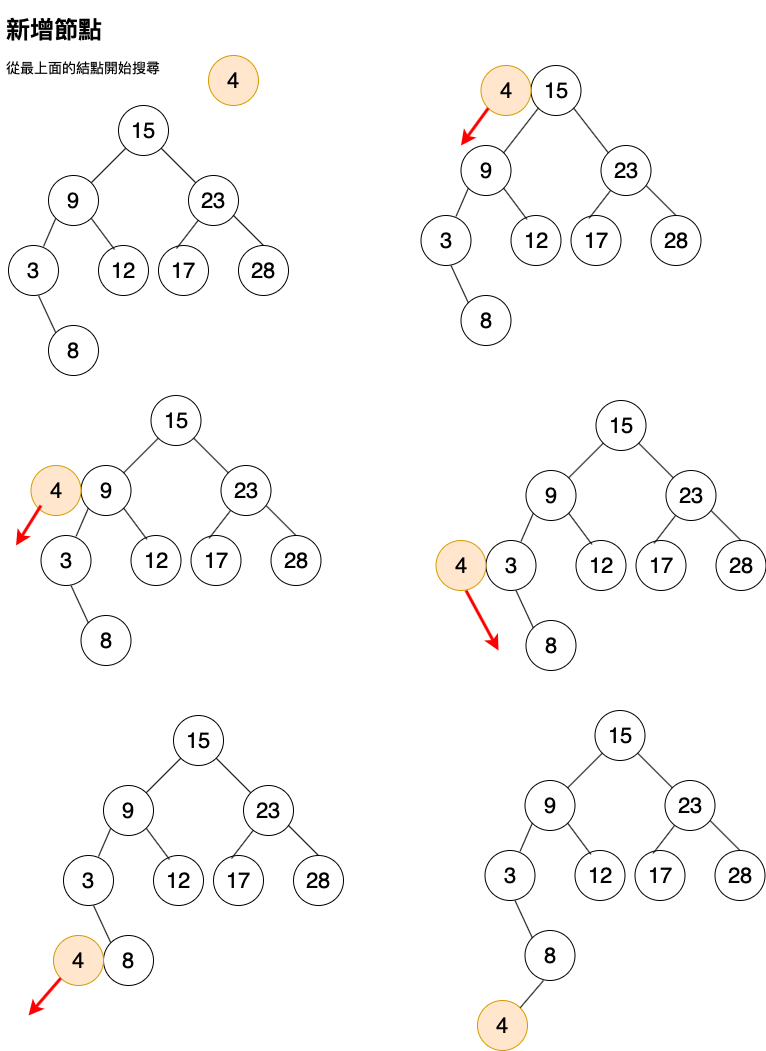

In [9]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/11:22作業/insert_node.png")

modify想法：
先利用delete功能，再利用insert功能
(1.) delete，需判斷無節點、有左節點、有右節點、有二個節點的狀況
(2.)重新整理樹狀後
(3.) insert，需與root比較，決定向右走(val > root.val)、向左走(val <= root.val)

In [10]:
def modify(self, root, target, new_val):
        """
        :type root: TreeNode
        :type target: int
        :type new_val: int
        :rtype:TreeNode(the root of new completed binary search tree) (cannot search())
        """
        cnt=[0]
        def dfs_cnt(root, target):
            if root:
                if root.val == target:
                    cnt[0] = cnt[0]+1
                dfs_cnt(root.left, target)
                dfs_cnt(root.right, target)
        dfs_cnt(root, target)
        self.delete(root, target)
        for i in range(cnt[0]):
            self.insert(root, new_val)    


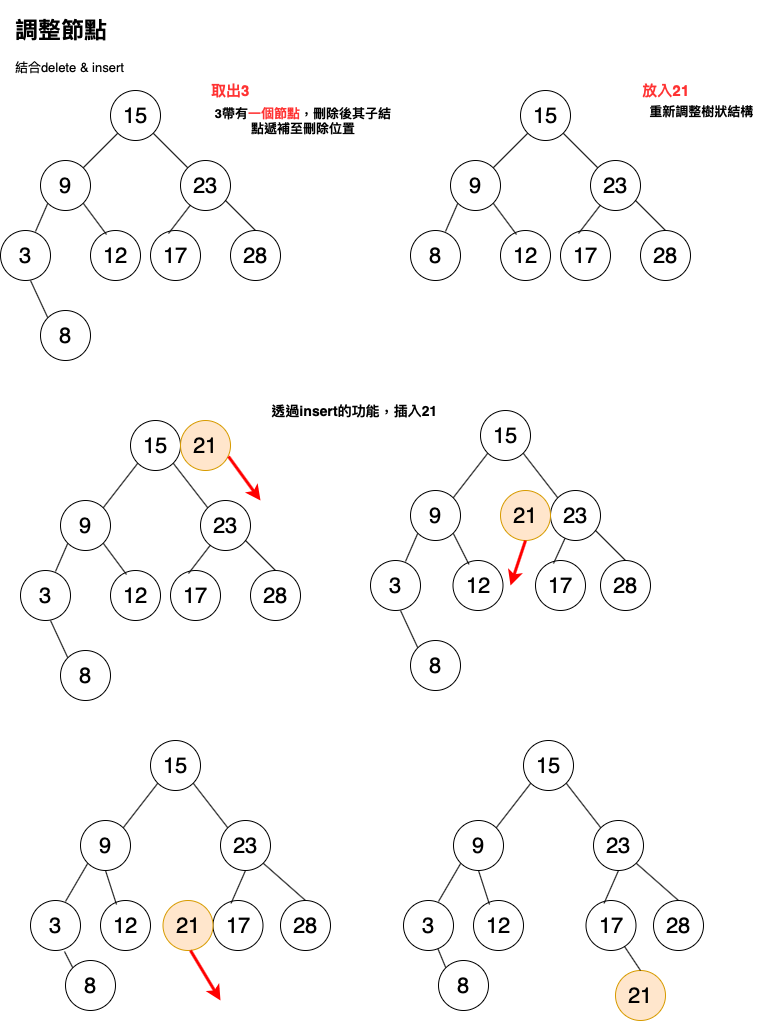

In [11]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/11:22作業/modify_node.png")